In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pre_data = pd.read_csv("C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Data\\PreProcessingDenmark.csv")
Pre_data

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
0,0,2015-07-21,Denmark,55.675979,12.532960,1.0,1.0,1.0,1.0,298.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,7
1,4,2015-10-07,Denmark,55.683966,12.553029,2.0,1.0,1.0,1.0,232.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,10
2,5,2014-07-27,Denmark,55.675400,12.546975,4.0,1.0,2.0,2.0,603.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6,7
3,6,2017-03-24,Denmark,55.680357,12.547335,2.0,1.0,1.0,1.0,715.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,3
4,7,2017-02-07,Denmark,55.684971,12.547870,6.0,1.0,2.0,6.0,649.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13359,478720,2016-05-24,Denmark,55.697434,12.541144,5.0,1.0,2.0,2.0,677.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5
13360,478721,2015-08-30,Denmark,55.695802,12.544935,3.0,1.0,1.0,2.0,279.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6,8
13361,478722,2014-01-30,Denmark,55.689624,12.556009,2.0,1.0,2.0,1.0,697.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1
13362,478723,2013-09-03,Denmark,55.699030,12.552144,3.0,1.0,1.0,2.0,677.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,9


<AxesSubplot:ylabel='Frequency'>

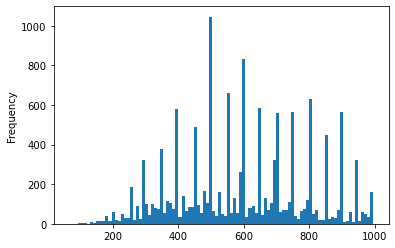

In [36]:
Pre_data['Price'].plot(kind='hist', bins=100)

In [37]:
Pre_data['group'] = pd.cut(x=Pre_data['Price'],
bins=[0, 200, 400, 600, 800, 1000],
labels=['group_1','group_2','group_3','group_4','group_5'])
Pre_data.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month,group
0,0,2015-07-21,Denmark,55.675979,12.532960,1.0,1.0,1.0,1.0,298.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,7,group_2
1,4,2015-10-07,Denmark,55.683966,12.553029,2.0,1.0,1.0,1.0,232.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,10,group_2
2,5,2014-07-27,Denmark,55.675400,12.546975,4.0,1.0,2.0,2.0,603.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6,7,group_4
3,6,2017-03-24,Denmark,55.680357,12.547335,2.0,1.0,1.0,1.0,715.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,3,group_4
4,7,2017-02-07,Denmark,55.684971,12.547870,6.0,1.0,2.0,6.0,649.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2,group_4


In [38]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Pre_data, Pre_data["group"]):
    train = Pre_data.loc[train_index]
    test = Pre_data.loc[test_index]

In [39]:
train['group'].value_counts() / len(train)

group_3    0.309887
group_4    0.289215
group_5    0.201010
group_2    0.186793
group_1    0.013095
Name: group, dtype: float64

In [40]:
test['group'].value_counts() / len(test)

group_3    0.310138
group_4    0.289188
group_5    0.200898
group_2    0.186682
group_1    0.013094
Name: group, dtype: float64

In [41]:
train.drop('group', axis=1, inplace=True)
train.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
3984,130746,2015-11-13,Denmark,55.707820,12.536160,4.0,1.0,2.0,2.0,498.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,11
52,90,2014-03-28,Denmark,55.688161,12.543245,5.0,1.0,2.0,2.0,750.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,3
4171,148145,2013-07-18,Denmark,55.690210,12.542147,3.0,1.0,1.0,2.0,669.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,7
3354,125191,2015-04-27,Denmark,55.697541,12.553861,3.0,1.0,1.0,2.0,649.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,4
2793,88780,2016-08-16,Denmark,55.664892,12.545502,2.0,1.0,1.0,1.0,702.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,8


In [42]:
test.drop(['Unnamed: 0','group', 'Host Since', 'Country', 'Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
test.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
238,55.692305,12.534201,2.0,1.0,1.0,1.0,245.0,1.0,0.0,1.0,1125.0,2.0,1.0,0.0,0.0,6,5
8002,55.659589,12.612911,6.0,2.0,2.0,4.0,803.0,1.0,0.0,5.0,20.0,3.0,1.0,0.0,0.0,6,6
5800,55.704292,12.582131,2.0,1.0,1.0,1.0,556.0,1.0,0.0,2.0,90.0,6.0,1.0,0.0,0.0,1,5
13290,55.688187,12.554637,5.0,1.0,2.0,2.0,848.0,2.0,100.0,2.0,7.0,7.0,1.0,0.0,0.0,3,11
2238,55.669507,12.543936,4.0,1.0,2.0,2.0,775.0,3.0,200.0,3.0,30.0,17.0,1.0,0.0,0.0,4,10


In [43]:
train_y = train[['Price']]
train_y.head()

,Price
3984,498.0
52,750.0
4171,669.0
3354,649.0
2793,702.0


In [44]:
train.drop(['Unnamed: 0', 'Price', 'Host Since', 'Country','Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
train_X = train
train_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
3984,55.707820,12.536160,4.0,1.0,2.0,2.0,1.0,0.0,2.0,1125.0,20.0,1.0,0.0,0.0,4,11
52,55.688161,12.543245,5.0,1.0,2.0,2.0,1.0,0.0,4.0,1125.0,3.0,1.0,0.0,0.0,4,3
4171,55.690210,12.542147,3.0,1.0,1.0,2.0,2.0,149.0,2.0,1125.0,15.0,1.0,0.0,0.0,3,7
3354,55.697541,12.553861,3.0,1.0,1.0,2.0,1.0,0.0,3.0,1125.0,15.0,1.0,0.0,0.0,0,4
2793,55.664892,12.545502,2.0,1.0,1.0,1.0,2.0,200.0,4.0,8.0,1.0,1.0,0.0,0.0,1,8


In [45]:
test_y= test[['Price']]
test_y.head()

,Price
238,245.0
8002,803.0
5800,556.0
13290,848.0
2238,775.0


In [46]:
test.drop('Price', axis=1, inplace=True)
test_X = test
test_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
238,55.692305,12.534201,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1125.0,2.0,1.0,0.0,0.0,6,5
8002,55.659589,12.612911,6.0,2.0,2.0,4.0,1.0,0.0,5.0,20.0,3.0,1.0,0.0,0.0,6,6
5800,55.704292,12.582131,2.0,1.0,1.0,1.0,1.0,0.0,2.0,90.0,6.0,1.0,0.0,0.0,1,5
13290,55.688187,12.554637,5.0,1.0,2.0,2.0,2.0,100.0,2.0,7.0,7.0,1.0,0.0,0.0,3,11
2238,55.669507,12.543936,4.0,1.0,2.0,2.0,3.0,200.0,3.0,30.0,17.0,1.0,0.0,0.0,4,10


In [47]:
# from sklearn.linear_model import LinearRegression

# l_reg = LinearRegression()
# l_reg.fit(train_X, train_y)

In [48]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

# predictions = l_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [49]:
# predictions = l_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [50]:
# from sklearn.tree import DecisionTreeRegressor

# d_reg = DecisionTreeRegressor()
# d_reg.fit(train_X, train_y)

In [51]:
# predictions = d_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [52]:
# predictions = d_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [53]:
# from sklearn.svm import SVR

# svr = SVR()
# svr.fit(train_X, train_y)

In [54]:
# predictions = svr.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [55]:
# predictions = svr.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [56]:
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor()
# knn.fit(train_X, train_y)

In [57]:
# predictions = knn.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [58]:
# predictions = knn.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [59]:
# from sklearn.neural_network import MLPRegressor

# ann = MLPRegressor()
# ann.fit(train_X, train_y)

In [60]:
# predictions = ann.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [61]:
# predictions = ann.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [62]:
from sklearn.ensemble import RandomForestRegressor

r_reg = RandomForestRegressor()
r_reg.fit(train_X, train_y)

C:\Users\2019A0~1\AppData\Local\Temp/ipykernel_14864/806139679.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(train_X, train_y)


RandomForestRegressor()

Text(0.5, 0, 'Relative Importance')

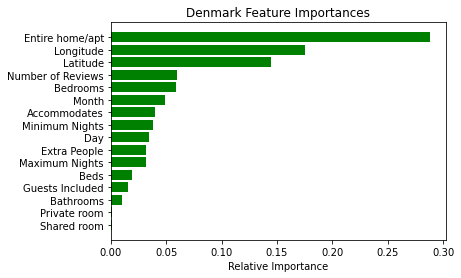

In [63]:
features = train_X.columns
importances = r_reg.feature_importances_
indices = np.argsort(importances)

plt.title('Denmark Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [64]:
predictions = r_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

2663.5222737816857 51.60932351602456 40.6590272191563


In [65]:
# from sklearn.model_selection import GridSearchCV

# param = {'n_estimators' : [800,900,1000], 'max_features' : ['sqrt','auto','log2'], 'max_depth' : [8,9,10],
#          'min_samples_split': [2,3,4]}

# r_reg = RandomForestRegressor(random_state=42)

# search = GridSearchCV(r_reg, param, cv=5,
#                       scoring='neg_mean_absolute_error')
                      
# search.fit(train_X, train_y['Price'].ravel())

In [66]:
# from sklearn.ensemble import RandomForestRegressor

# r_reg = RandomForestRegressor(bootstrap=True,
#                               min_samples_split=2,
#                               criterion='mse',
#                               max_depth=None,
#                               max_features='auto',
#                               n_estimators=1000,
#                               random_state=42,
#                               )
# r_reg.fit(train_X, train_y['Price'].ravel())

In [67]:
# predictions = r_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)